In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
df = pd.read_csv('features/91app_features.txt')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
pd.set_option('display.max_columns', 40)

In [26]:
pd.set_option('display.max_rows', 100)

In [11]:
df

,memberid,online_ratio,total_day_using_percentage,actually_using_percentage,view_per_date,total_conversion_rate,off_cart_c,off_fav_c,off_view_c,on_cart_c,on_fav_c,on_view_c,total_cart_c,total_fav_c,total_view_c,viewtime_ave,view_time_med,201803F,201804F,201805F,...,201902F,201903F,201904F,201803M,201804M,201805M,201806M,201807M,201808M,201809M,201810M,201811M,201812M,201901M,201902M,201903M,201904M,total_F,total_M,total_discount_percentage
0,23722,NaN,0.002849,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,44751,NaN,0.022923,0.026846,3.875000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.376190,50.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,66732,NaN,0.027160,0.108911,4.363636,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.985833,27.325000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,108059,NaN,0.003058,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,12.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,257559,NaN,0.006061,0.250000,1.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,22.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
5,314792,NaN,0.006116,0.016529,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
6,394660,NaN,0.012019,0.016129,1.600000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,37.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
7,437828,NaN,0.002770,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
8,439730,NaN,0.002817,1.000000,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.000000,46.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
9,519517,NaN,0.002488,1.000000,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.333333,43.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [13]:
df.describe()

,online_ratio,total_day_using_percentage,actually_using_percentage,view_per_date,total_conversion_rate,off_cart_c,off_fav_c,off_view_c,on_cart_c,on_fav_c,on_view_c,total_cart_c,total_fav_c,total_view_c,viewtime_ave,view_time_med,201803F,201804F,201805F,201806F,...,201902F,201903F,201904F,201803M,201804M,201805M,201806M,201807M,201808M,201809M,201810M,201811M,201812M,201901M,201902M,201903M,201904M,total_F,total_M,total_discount_percentage
count,48803.000000,76401.000000,76401.000000,76401.000000,76401.000000,8317.000000,7367.000000,23757.000000,16283.000000,7168.000000,16500.000000,20691.000000,12510.000000,33983.000000,69452.000000,69452.000000,76401.000000,76401.000000,76401.000000,76401.000000,...,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,76401.000000,48792.000000
mean,0.248956,0.090230,0.311270,5.856662,0.301787,0.127946,0.078662,0.046197,0.632877,0.197247,0.155050,0.484761,0.134012,0.087240,62.163306,47.171599,0.105588,0.154474,0.182628,0.184801,...,0.143257,0.151412,0.169239,315.004673,414.941074,507.007709,473.530137,546.165980,417.892305,396.815722,564.964987,659.906415,615.157393,617.377914,424.548147,409.644638,461.362809,2.377024,6824.319904,0.052758
std,0.398780,0.130388,0.353234,6.056125,0.857839,0.264459,0.197630,0.119654,0.306363,0.288673,0.219498,0.356269,0.246800,0.167359,64.279251,58.059515,0.479955,0.618465,0.681609,0.680524,...,0.524767,0.575713,0.588833,1650.760700,1987.893322,2232.392599,2117.984120,2059.601015,1841.737740,1849.489309,2642.060689,2746.361930,2635.102124,2639.822934,1884.723905,1804.951821,1891.038357,4.954765,16145.459095,0.069008
min,0.000000,0.002370,0.004988,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,-6600.000000,-900.000000,-200.000000,-880.000000,-6300.000000,-2760.000000,-100.000000,-100.000000,-200.000000,0.000000,0.000000,0.000000
25%,0.000000,0.013333,0.060606,2.346154,0.000000,0.000000,0.000000,0.000000,0.375000,0.000000,0.035700,0.173833,0.000000,0.000000,33.393010,26.125000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007971
50%,0.000000,0.039474,0.137931,4.283186,0.047619,0.000000,0.000000,0.000000,0.625000,0.064500,0.076300,0.500000,0.000000,0.032300,48.111359,36.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2060.000000,0.033930
75%,0.500000,0.108696,0.408537,7.280000,0.250000,0.125000,0.040440,0.042200,1.000000,0.271787,0.166700,0.791675,0.166650,0.090900,70.250000,50.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6900.000000,0.067568
max,1.000000,1.000000,1.000000,221.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1773.000000,1773.000000,19.000000,21.000000,35.000000,22.000000,...,11.000000,19.000000,16.000000,65870.000000,166320.000000,100130.000000,120590.000000,95830.000000,97300.000000,98380.000000,265710.000000,118520.000000,91180.000000,123240.000000,51840.000000,48240.000000,59160.000000,219.000000,857190.000000,0.920245


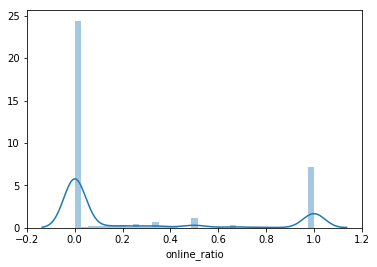

In [22]:
sns.distplot(df['online_ratio'].dropna())

約3/4 全部線下購買  1/4全部線上購買 只有少數佔一半一半

34169 個offline buyer, online_ratio<=0.2

In [36]:
def is_offline_buyer(row):
    if row['online_ratio'] <= 0.2:
        val = 1
    elif row['online_ratio'] > 0.2:
        val = 0
    else:
        val = 'not a buyer'
    return val

In [37]:
df['offline_buyer'] = df.apply(is_offline_buyer, axis=1)

In [38]:
df

,memberid,online_ratio,total_day_using_percentage,actually_using_percentage,view_per_date,total_conversion_rate,off_cart_c,off_fav_c,off_view_c,on_cart_c,on_fav_c,on_view_c,total_cart_c,total_fav_c,total_view_c,viewtime_ave,view_time_med,201803F,201804F,201805F,...,201903F,201904F,201803M,201804M,201805M,201806M,201807M,201808M,201809M,201810M,201811M,201812M,201901M,201902M,201903M,201904M,total_F,total_M,total_discount_percentage,offline_buyer
0,23722,NaN,0.002849,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
1,44751,NaN,0.022923,0.026846,3.875000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.376190,50.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
2,66732,NaN,0.027160,0.108911,4.363636,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.985833,27.325000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
3,108059,NaN,0.003058,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,12.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
4,257559,NaN,0.006061,0.250000,1.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,22.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
5,314792,NaN,0.006116,0.016529,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
6,394660,NaN,0.012019,0.016129,1.600000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,37.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
7,437828,NaN,0.002770,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
8,439730,NaN,0.002817,1.000000,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.000000,46.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
9,519517,NaN,0.002488,1.000000,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.333333,43.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer


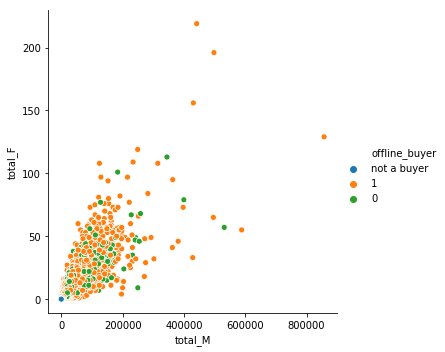

In [42]:
sns.relplot(x="total_M", y="total_F", hue ="offline_buyer",data=df)

看要怎麼切 

In [43]:
sns.relplot(x="total_M", y="total_F", hue ="offline_buyer",data=df)

TypeError: '<' not supported between instances of 'str' and 'int'

In [44]:
total_M_less_than_200k = df.loc[df["total_M"]<200000]

In [45]:
total_M_less_than_200k

,memberid,online_ratio,total_day_using_percentage,actually_using_percentage,view_per_date,total_conversion_rate,off_cart_c,off_fav_c,off_view_c,on_cart_c,on_fav_c,on_view_c,total_cart_c,total_fav_c,total_view_c,viewtime_ave,view_time_med,201803F,201804F,201805F,...,201903F,201904F,201803M,201804M,201805M,201806M,201807M,201808M,201809M,201810M,201811M,201812M,201901M,201902M,201903M,201904M,total_F,total_M,total_discount_percentage,offline_buyer
0,23722,NaN,0.002849,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
1,44751,NaN,0.022923,0.026846,3.875000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.376190,50.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
2,66732,NaN,0.027160,0.108911,4.363636,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.985833,27.325000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
3,108059,NaN,0.003058,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,12.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
4,257559,NaN,0.006061,0.250000,1.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,22.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
5,314792,NaN,0.006116,0.016529,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
6,394660,NaN,0.012019,0.016129,1.600000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,37.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
7,437828,NaN,0.002770,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
8,439730,NaN,0.002817,1.000000,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.000000,46.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer
9,519517,NaN,0.002488,1.000000,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.333333,43.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,not a buyer


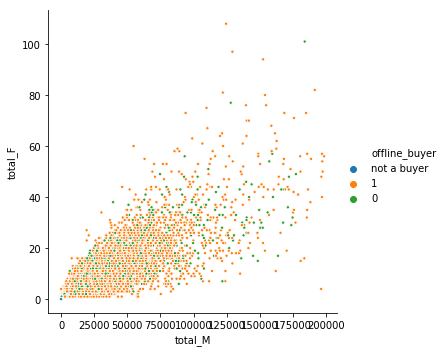

In [51]:
sns.relplot(x="total_M", y="total_F", hue ="offline_buyer",data=total_M_less_than_200k,s=10)

好像還是沒有特別明顯的分區 但可以看出offline f跟m比較高一點

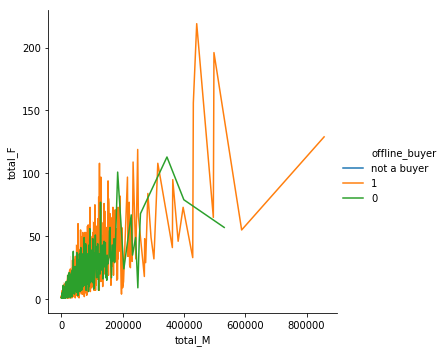

In [53]:
sns.relplot(x="total_M", y="total_F", hue ="offline_buyer",data=df,
            kind="line")